In [2]:
print ("Hello Universe")

Hello Universe


In [5]:
import sys
import numpy as np
import pandas as pd

print ("Python version " + sys.version)
print ("Numpy version " + np.__version__)
print ("Pandas version " + pd.__version__)

inputs = [1.2, 3.2, 2.3]

weights = [[3.1, 2.1, 8.7],
        [2.2, -0.95, 2.1],
        [3.1, 6.1, 0.87]]
bias = [3, 2 , 0.5]

output = np.dot(weights, inputs) + bias
print (output)

Python version 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Numpy version 2.0.2
Pandas version 2.2.2
[33.45   6.43  25.741]


In [1]:
import keras

## ***Two Class Classification/ Binary Classification ***

In [2]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Preparing the** **Data**

In [2]:
import numpy as np
from keras import models
from keras import losses
from keras import layers
from keras import optimizers
from keras import metrics

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

#Vectorizing the Sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#Vectorizing the training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Vectorizing the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Compilation (Defining the model, layers, loss functions, activation function,
#optimizers)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7144 - loss: 0.1969
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9017 - loss: 0.0882
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9209 - loss: 0.0669
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9335 - loss: 0.0561
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8678 - loss: 0.0970


Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.9463 - loss: 0.0462 - val_accuracy: 0.9427 - val_loss: 0.0488
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9540 - loss: 0.0404 - val_accuracy: 0.9315 - val_loss: 0.0543
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9654 - loss: 0.0331 - val_accuracy: 0.8816 - val_loss: 0.0859
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9651 - loss: 0.0321 - val_accuracy: 0.9284 - val_loss: 0.0554


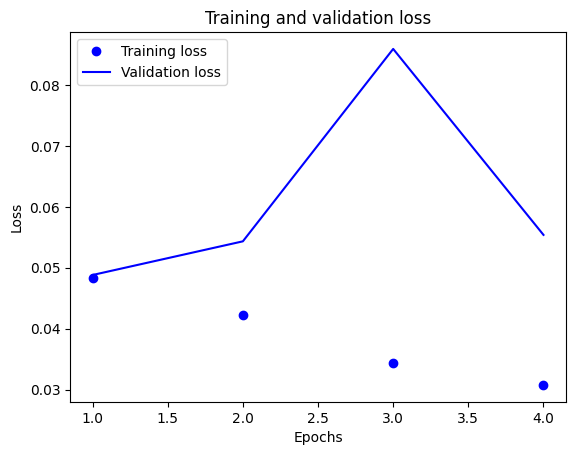

In [3]:
import matplotlib.pyplot as plt

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
#“bo” is for “blue dot.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#“b” is for “solid blue line.”
plt.show()

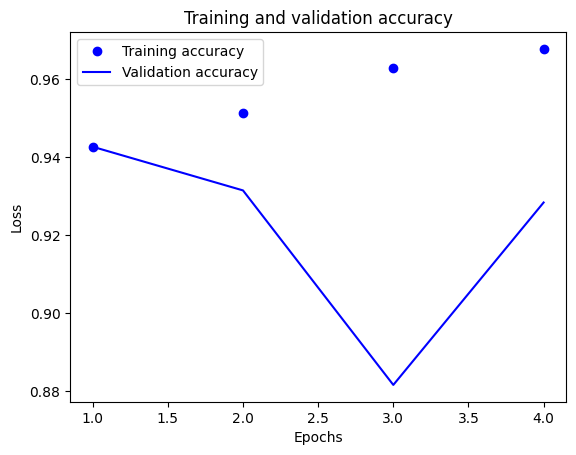

In [9]:
plt.clf() #Clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Multi-Class Classification**

In [15]:
from keras.datasets import reuters
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)
print(len(train_data))
print(train_data)

8982
[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67

In [23]:
import numpy as np
from keras import models
from keras import losses
from keras import layers
from keras import optimizers
from keras import metrics

#Vectorizing the Sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#Vectorizing the training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Vectorizing the labels
y_train = np.array(train_labels)
y_test = np.array(test_labels)

#Compilation
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)





Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6795 - loss: 1.0083 - val_accuracy: 0.8600 - val_loss: 0.3373
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9102 - loss: 0.2335 - val_accuracy: 0.8324 - val_loss: 0.4373
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9361 - loss: 0.1668 - val_accuracy: 0.8845 - val_loss: 0.3171
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9615 - loss: 0.1101 - val_accuracy: 0.8777 - val_loss: 0.3613
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9753 - loss: 0.0750 - val_accuracy: 0.8774 - val_loss: 0.3843
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9864 - loss: 0.0466 - val_accuracy: 0.8771 - val_loss: 0.4605
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9928 - loss: 0.0261 - val_accuracy: 0.8657 - val_loss: 0.5627
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9965 - loss: 0.0138 - val_accuracy: 0

# ***Regression Classification ***

In [8]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data.shape

test_data.shape

#Normalizing the Data (Feature-wise Normalization)
#Subtract each feature with mean and Divide by Standard Deviation
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


In [9]:
#Building the network
import numpy as np
from keras import models
from keras import losses
from keras import layers
from keras import optimizers
from keras import metrics

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #Scalar Regression (Used for single prediction)
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model



In [12]:
#Validation using K-fold Validation
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]], axis=0)

partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
train_targets[(i + 1) * num_val_samples:]], axis=0)

model = build_model()
model.fit(partial_train_data, partial_train_targets,
epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Building the final model
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 14.0050 - mae: 2.6153
